# Практика 5. Дискретные случайные величины. Функция распределения. Матожидание. Дисперсия.

## Мотивация

## Теория

[Случайные величины](https://nsu.ru/mmf/tvims/chernova/tv/lec/node23.html#SECTION000710)

[Распределения случайных величин](https://nsu.ru/mmf/tvims/chernova/tv/lec/node24.html#SECTION000720)

[Функция распределения](https://nsu.ru/mmf/tvims/chernova/tv/lec/node25.html#SECTION000730)

[Примеры дискретных распределений](https://nsu.ru/mmf/tvims/chernova/tv/lec/node26.html)

## Видео

[Случайные величины](https://stepik.org/lesson/48676/step/1?unit=26447)

## Определения

## Кодец

In [24]:
import collections
from fractions import Fraction
import math

class DRV(object):
    def __init__(self, table):
        if not isinstance(table, list):
            raise ValueError()
        if abs(sum(p for x, p in table) - 1) > 1e-5:
            raise ValueError()
        self.p = collections.defaultdict(Fraction)
        for x, p in table:
            self.p[x] += p
    
    def _get_compose(self, other, func):
        return DRV([(func(x1, x2), p1 * p2) for x1, p1 in self.p.items() for x2, p2 in other.p.items()])
    
    def __add__(self, other):
        return self._get_compose(other, lambda x1, x2: x1 + x2)

    def __mul__(self, other):
        return self._get_compose(other, lambda x1, x2: x1 * x2)
    
    def __str__(self):
        sort = sorted(self.p.items(), key=lambda kv: kv[0])
        return '\n'.join(["{}:{}".format(x, p) for x, p in sort])
    
    def max(self, other):
        return self._get_compose(other, lambda x1, x2: max(x1, x2))

    def min(self, other):
        return self._get_compose(other, lambda x1, x2: min(x1, x2))
    
    def toList(self):
        sort = sorted(self.p.items(), key=lambda kv: kv[0])
        return sort


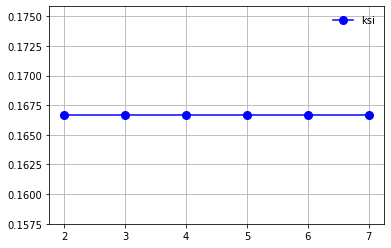

In [23]:
cube = [(i, Fraction(1, 6)) for i in range(2, 8)]
ksi = DRV(cube)

from matplotlib import pyplot as plt

x = [i[0] for i in ksi.toList()]
y = [i[1] for i in ksi.toList()]

fig, ax = plt.subplots(1, 1)
ax.plot( x,y, 'bo-', ms=8, label='ksi')
ax.legend(loc='best', frameon=False)
plt.grid()
plt.show()

## Задачи на пару

**1.** У нас есть правильный кубик и неправильная монетка, на сторонах которой написаны $0$ и $1$: $0$ выпадает с вероятностью $\frac{2}{3}$, $1$ соответственно $\frac{1}{3}$. Пусть $\xi$ - ДСВ, которая соответствует числу, выпавшему на грани первого кубика, а $\mu$ - на неправильной монетке.

Найти закон распределения, функцию распределения, матожидание и дисперсию случайной величины:
* $\theta = 2\xi +\mu +  3$
* $\theta = \xi\mu$
* $\theta = max(\xi-4, \mu)$

**2.** В партии из 10 деталей имеется 8 стандартных. Наудачу отобраны две
детали. Составить закон распределения числа стандартных деталей
среди отобранных.

**3.** 
Случайным образом выстраиваются в шеренгу $n$ человек разного роста. Найдите вероятность того, что
* самый низкий окажется $i$-м слева;
* самый высокий окажется первым слева, а самый низкий -- последним слева;
* самый высокий и самый низкий окажутся рядом;
* между самым высоким и самым низким расположатся более $k$ человек.

## ДЗ

**1.**
Пусть случайные величины $\xi$ и $\eta$ независимы и распределены по закону Пуассона с параметрами $\lambda$ и $\mu$. Докажите, что величина $\xi+\eta$ тоже распределена по закону Пуассона и найдите параметр этого распределения.


**1.** 
Произведение двух независимых равномерно распределенных на $\{0,1,\ldots,9\}$ однозначных чисел $\xi$ и $\eta$ можно записать в виде $\xi\eta=10\zeta_1+\zeta_2$. Найти законы распределения $\zeta_1$, и $\zeta_2$. Зависимы ли $\zeta_1$, и $\zeta_2$?

## Гробы

Пусть случайные величины $\xi_1,\ldots, \xi_n$ независимы в совокупности и распределены по закону Пуассона с параметрами $\lambda_1,\ldots, \lambda_n$ соответственно. Докажите, что величина $\sum_{i=1}^{n}\xi_i$ тоже распределена по закону Пуассона и найдите параметр этого распределения.
